<a href="https://colab.research.google.com/github/ZakariaBOUZIT/random.datascience/blob/main/TP1_PCA_%26_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BOUZITZakaria.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from sklearn.svm import SVC
import seaborn as sb

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
data = pd.read_csv('gdrive/MyDrive/tp1.data',names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
data

,sepal length,sepal width,petal length,petal width,species
0,4.7,3.2,1.3,0.2,interior
1,4.6,3.1,1.5,0.2,interior
2,5.0,3.6,1.4,0.2,interior
3,5.4,3.9,1.7,0.4,interior
4,4.6,3.4,1.4,0.3,interior
...,...,...,...,...,...
139,6.7,3.0,5.2,2.3,convoluta
140,6.3,2.5,5.0,1.9,convoluta
141,6.5,3.0,5.2,2.0,convoluta
142,6.2,3.4,5.4,2.3,convoluta


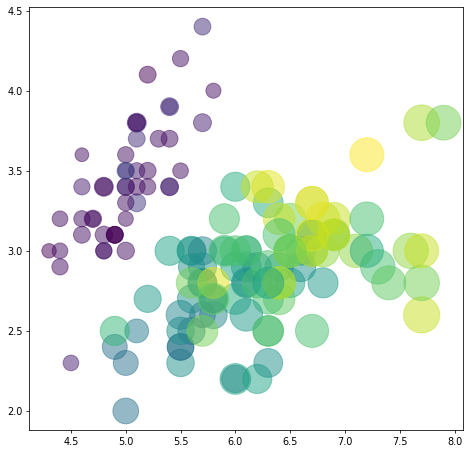

In [39]:
figure(figsize=(8, 8), dpi=70)
plt.scatter(data.iloc[:,0], data.iloc[:,1], alpha =0.5, s = 200 * data.iloc[:,2], c = 100 * data.iloc[:,3])

###1.Principal Component Analysis.

In [40]:
def PCA(X, plot_eig):
  print("X : \n",X)
  x_shifted = X.copy()
  #1.mean
  mean = np.mean(X, axis=1)
  for i in range(2):
    for j in range(4):
      x_shifted[i,j] -= mean[i]
  print("---------------------------------------------")
  print("x_shifted: \n",x_shifted)
  #3.covariance matrix 
  C = np.dot(x_shifted, x_shifted.transpose())
  print("---------------------------------------------")
  print("C", C)
  #4.
  eigvalues, eigvectors  = np.linalg.eig(C)
  print("---------------------------------------------")
  print("eigvalues :",eigvalues)
  print("---------------------------------------------")
  print("eigvectors :\n",eigvectors)
  #5. 
  m = max(eigvalues)
  index = np.argsort(m)
  Up = eigvectors[:,index]
  s = np.dot(Up.transpose(),x_shifted)
  print("-----------------------------------------------------------------------")
  print("reduced X :\n",s)
  print("-----------------------------------------------------------------------")
    
  if plot_eig == True:
    figure(figsize=(8, 8), dpi=100)
    plt.arrow(0,0, eigvalues[0]*eigvectors[0,0], eigvalues[0]*eigvectors[1,0], width = 0.09, ec ='green')
    plt.arrow(0,0, eigvalues[1]*eigvectors[0,1], eigvalues[1]*eigvectors[1,1], width = 0.09, ec ='green')
    plt.scatter(X[0,:],X[1,:],c = 'black', s = 60)
    plt.scatter(x_shifted[0,:],x_shifted[1,:],c = 'red', s = 60)
    plt.xlim([-5, 10])
    plt.ylim([-4, 6])
    plt.legend(["X", "shifted X"])
  

X : 
 [[1 5 3 3]
 [4 4 3 5]]
---------------------------------------------
x_shifted: 
 [[-2  2  0  0]
 [ 0  0 -1  1]]
---------------------------------------------
C [[8 0]
 [0 2]]
---------------------------------------------
eigvalues : [8. 2.]
---------------------------------------------
eigvectors :
 [[1. 0.]
 [0. 1.]]
-----------------------------------------------------------------------
reduced X :
 [[-2.  2.  0.  0.]]
-----------------------------------------------------------------------


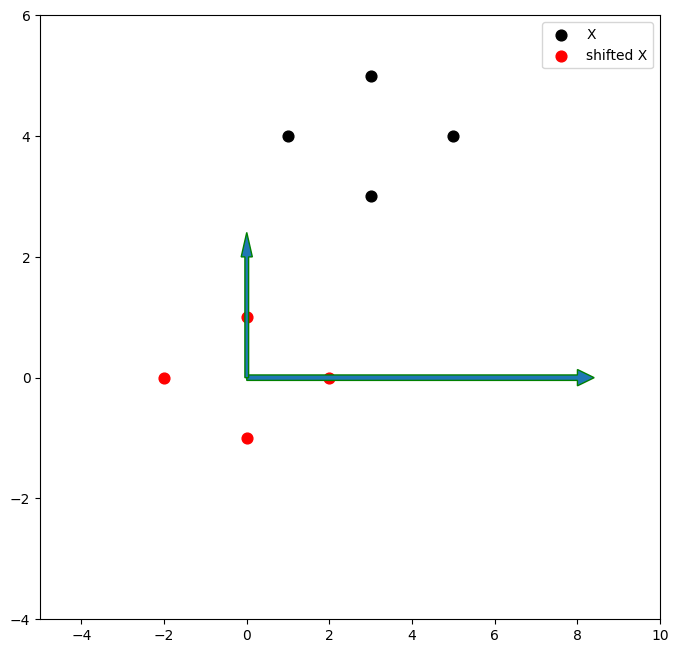

In [41]:
#apply to example 1
X1 = np.array([[1,5,3,3],[4,4,3,5]])
PCA(X1,1)

X : 
 [[1.268 4.732 3.5   2.5  ]
 [3.    5.    3.134 4.866]]
---------------------------------------------
x_shifted: 
 [[-1.732  1.732  0.5   -0.5  ]
 [-1.     1.    -0.866  0.866]]
---------------------------------------------
C [[6.499648 2.598   ]
 [2.598    3.499912]]
---------------------------------------------
eigvalues : [7.999648 1.999912]
---------------------------------------------
eigvectors :
 [[ 0.86601905 -0.500011  ]
 [ 0.500011    0.86601905]]
-----------------------------------------------------------------------
reduced X :
 [[-1.99995600e+00  1.99995600e+00 -5.55111512e-17 -1.66533454e-16]]
-----------------------------------------------------------------------


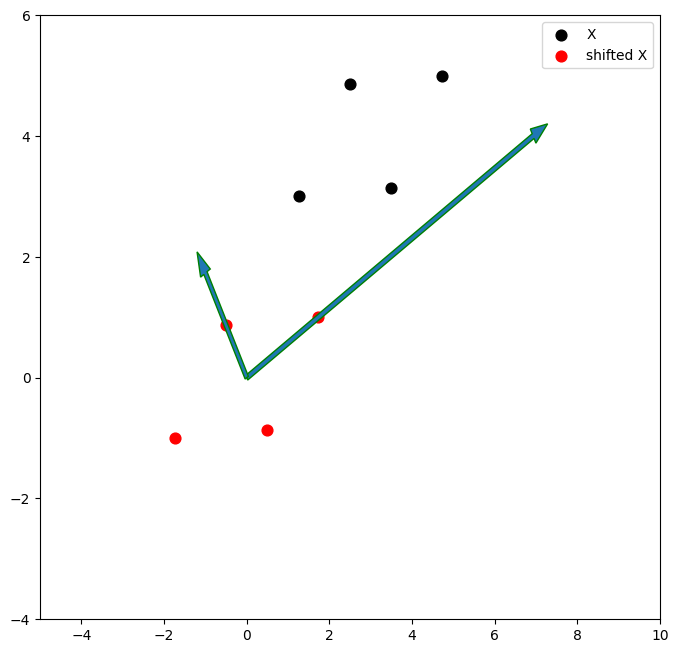

In [42]:
#second example
X2 = np.array([[1.268,4.732,3.5,2.5],[3,5,3.134,4.866]])
PCA(X2,1)

###2.PCA to our data.

In [46]:
x = data.iloc[:, 0:4]
x_ = x.copy()
#Apply to flower dataset
x_array = x_.to_numpy()
x_array = x_array.transpose()
print("size of x_array : ({},{})".format(len(x_array),len(x_array[0])))
print("---------------------------------------------")
mean = np.mean(x_array,axis=1)
for i in range(4):
  for j in range(144):
    x_array[i,j] = x_array[i,j] - mean[i]
print("size of x_array shifted : ({},{})".format(len(x_array),len(x_array[0])))
C = np.dot(x_array, x_array.transpose())
eigvalues, eigvectors  = np.linalg.eig(C)
print("---------------------------------------------")
print("eigvalues :",eigvalues)
print("---------------------------------------------")
print("eigvectors :\n",eigvectors)
Up = np.array([eigvectors[:,0],eigvectors[:,1]]).transpose()
s = np.dot(Up.transpose(),x_array)
print("---------------------------------------------")
print("size of s : ({},{})".format(len(s),len(s[0])))

size of x_array : (4,144)
---------------------------------------------
size of x_array shifted : (4,144)
---------------------------------------------
eigvalues : [603.9996267   35.06195758  10.81154895   3.51645011]
---------------------------------------------
eigvectors :
 [[ 0.36422518 -0.64594878 -0.58861273  0.32190876]
 [-0.084788   -0.7403414   0.58027646 -0.32861048]
 [ 0.85596458  0.17441047  0.07527205 -0.48087394]
 [ 0.35703733  0.06500598  0.55780679  0.74642492]]
---------------------------------------------
size of s : (2,144)


Text(0, 0.5, 'PC2')

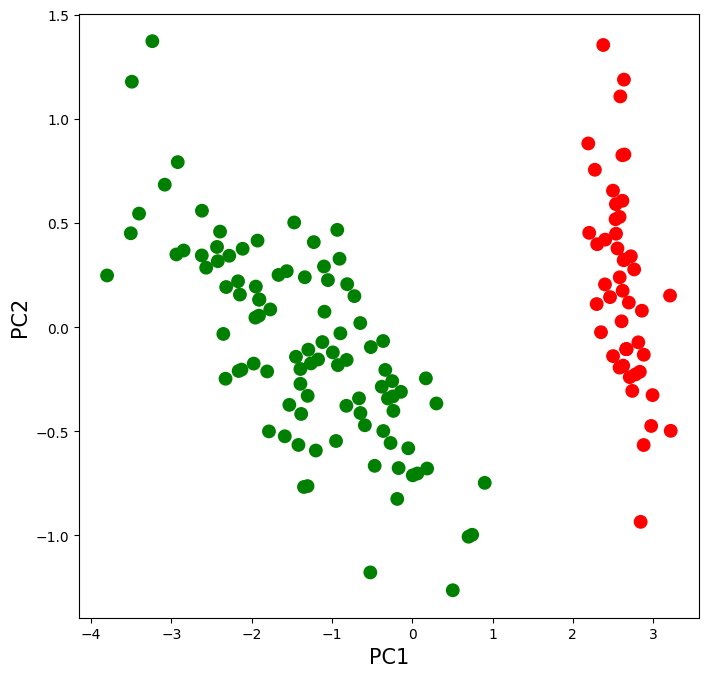

In [47]:
figure(figsize=(8, 8), dpi=100)
plt.scatter(-s[0,:],-s[1,:], s = 80, c = np.where(-s[0,:]>2, 'r', 'g'))
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)

###3.SVM to our data

In [ ]:
s_ = s.transpose()
data = pd.read_csv('gdrive/MyDrive/tp1.data',names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
target = data['species']
for i in range(144):
  if target[i] == "interior":
    target[i] = 1
  else:
    target[i] = -1
s_ = np.append(s_,data.iloc[:,4:5], axis=1)

In [49]:
s_svm = s_[:,0:2]
y = s_[:,2]
y = y.astype('int')
clf1 = SVC(kernel='linear', C=1E10)
clf1.fit(-s_svm,y)
clf2 = SVC(kernel='linear', C=1E10)
clf2.fit(s_svm,y)

SVC(C=10000000000.0, kernel='linear')

(-4.0, 4.0)

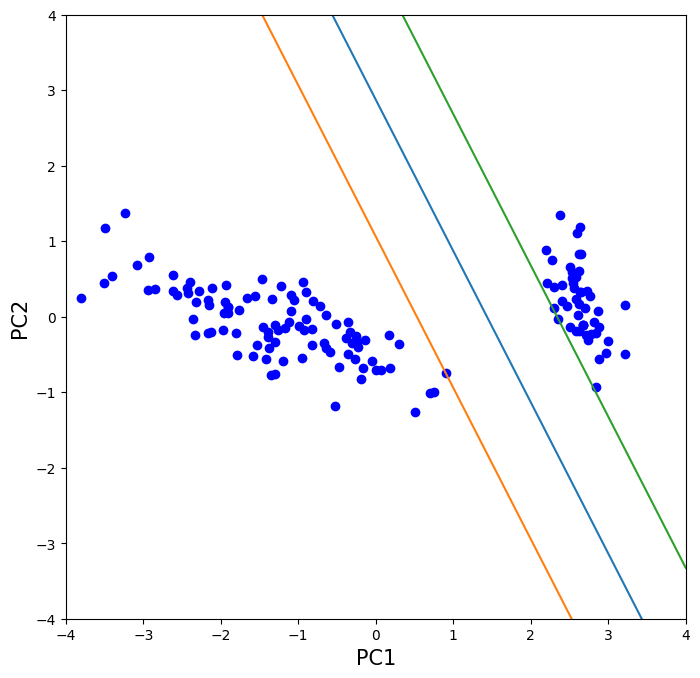

In [51]:
#hyperplane
w = clf1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 4)
yy = a * xx - (clf1.intercept_[0])/ w[1]
#decision boundries
margin = 1 / np.sqrt(np.sum(clf1.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

figure(figsize=(8, 8), dpi=100)
plt.scatter(-s_svm[:,0],-s_svm[:,1],c = 'blue')

plt.plot(xx,yy)
plt.plot(xx,yy_down)
plt.plot(xx,yy_up)

plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.xlim([-4, 4])
plt.ylim([-4, 4])

In [52]:
#classification test
new_data = np.array([[5.1,3.5,1.4,0.2],[7.0,3.2,4.7,1.4],[6.4,3.2,4.5,1.5],[6.3,3.3,6.0,2.5],[5.8,2.7,5.1,1.9],[4.9,3.0,1.4,0.2]])
#Apply PCA
x_array = new_data.transpose()
mean = np.mean(x_array,axis=1)
for i in range(4):
  for j in range(6):
    x_array[i,j] = x_array[i,j] - mean[i]
C = np.dot(x_array, x_array.transpose())
eigvalues, eigvectors  = np.linalg.eig(C)
Up = np.array([eigvectors[:,0],eigvectors[:,1]]).transpose()
s_data = np.dot(Up.transpose(),x_array)

In [53]:
prediction = clf2.predict(s_data.transpose())
prediction_labeled = []
for i in range(len(prediction)):
  if prediction[i] == 1:
    prediction_labeled.append("INTERIOR")
  else:
    prediction_labeled.append("NOT INTERIOR")

for i in range(len(prediction_labeled)):
  print("sample {} is : \t {} :\t {}".format(i, prediction_labeled[i], prediction[i]))

sample 0 is : 	 INTERIOR :	 1
sample 1 is : 	 NOT INTERIOR :	 -1
sample 2 is : 	 NOT INTERIOR :	 -1
sample 3 is : 	 NOT INTERIOR :	 -1
sample 4 is : 	 NOT INTERIOR :	 -1
sample 5 is : 	 INTERIOR :	 1


###4.Kernel trick SVM

In [17]:
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score

In [54]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=200)
  ax.set_xlabel('feature 1 : X1')
  ax.set_ylabel('feature 2 : X2')
  ax.set_zlabel('Y')
  return ax

In [56]:
nonlineardata = pd.read_excel('gdrive/MyDrive/SVM_Data.xlsx', names = ['feature1', 'feature2', 'class'])
nonlineardata.head(5)

,feature1,feature2,class
0,-0.364924,0.230728,1
1,-0.293515,-0.974130,0
2,0.470622,0.966409,0
3,-0.549030,0.869911,0
4,-1.072329,-0.195141,0


In [57]:
X = nonlineardata.loc[:, ["feature1", "feature2"]].values
y = nonlineardata.loc[:, "class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Text(0, 0.5, 'feature2 : X2')

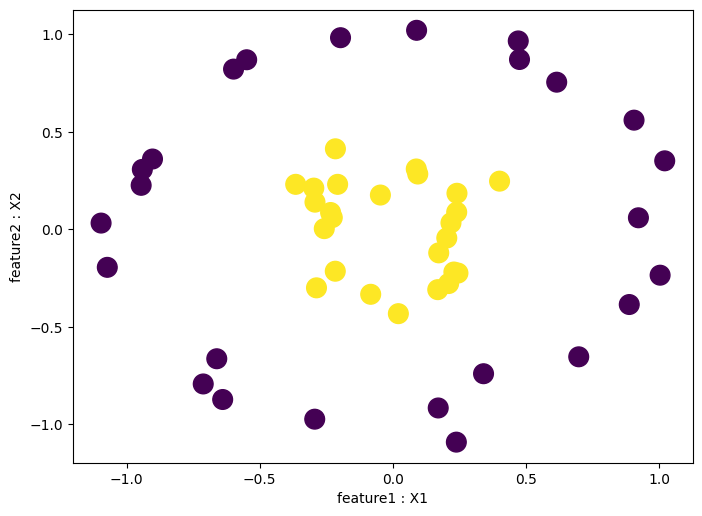

In [58]:
figure(figsize=(8, 6), dpi=100)
plt.scatter(X[:,0],X[:,1], c=y, s=200)
plt.xlabel("feature1 : X1")
plt.ylabel("feature2 : X2")

Text(0.5, 0.92, '3D plot')

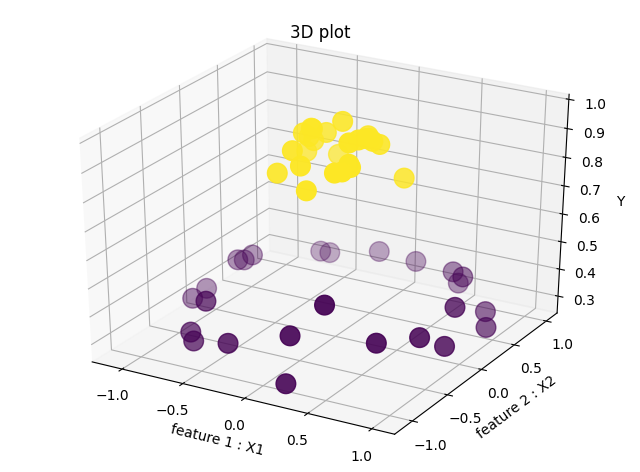

In [59]:
figure(figsize=(8, 6), dpi=100)
plot_3d_plot(X, y)
plt.title("3D plot")

In [60]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("classifier accuracy = {}".format(acc))

classifier accuracy = 0.38461538461538464


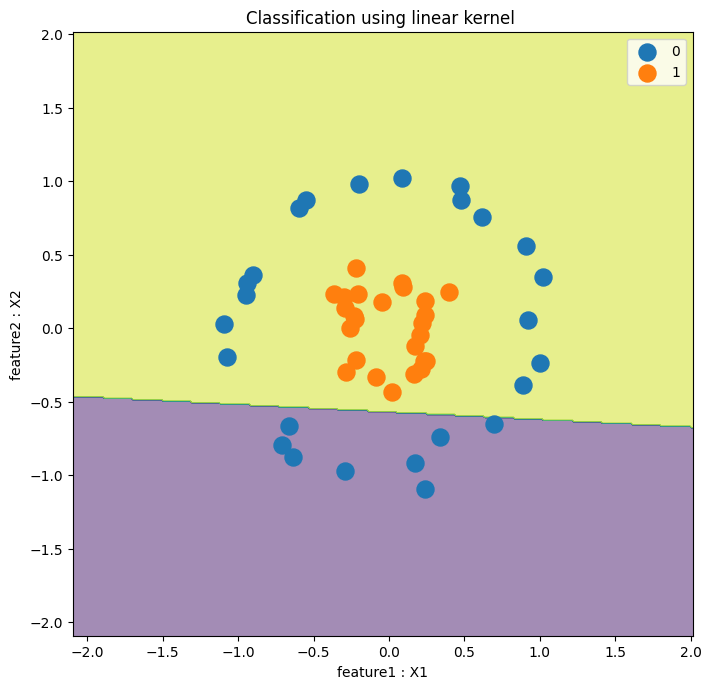

In [61]:
def plot_decision_boundary(X, y, clf, xlab, ylab, tle = 'SVM Decision Boundary'):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
                                 
  
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5 )
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],label = j, s=150)
  plt.title(tle)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.legend()
  return plt.show()
figure(figsize=(8, 8), dpi=100)
plt.title("Non linear data plot")
plot_decision_boundary(X, y, classifier, "feature1 : X1", "feature2 : X2", "Classification using linear kernel ")

In [62]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train.ravel())
y_pred = rbf_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("classifier accuracy = {}".format(acc))

classifier accuracy = 1.0


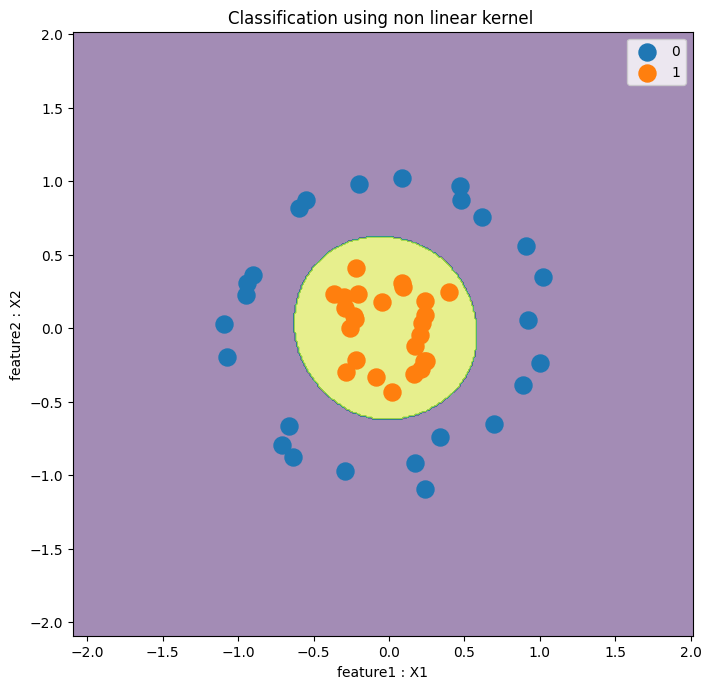

In [63]:
figure(figsize=(8, 8), dpi=100)
plt.title("Non linear data plot")
plot_decision_boundary(X, y, rbf_classifier, "feature1 : X1", "feature2 : X2", "Classification using non linear kernel ")